#  Qiskit Super Dense Coding

In [1]:
import qiskit
import numpy as np
from qiskit import execute, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, BasicAer
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram
from math import pi, sqrt

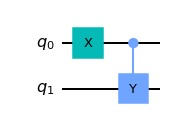

In [17]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cy(0,1)
qc.draw('mpl')

In [18]:
qc.measure_all()

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
counts = result.get_counts()


Total count are:
 {'11': 1000}


C:\Anaconda_py\lib\site-packages\qiskit\visualization\counts_visualization.py:181: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
C:\Anaconda_py\lib\site-packages\qiskit\visualization\counts_visualization.py:181: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
C:\Anaconda_py\lib\site-packages\qiskit\visualization\counts_visualization.py:181: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
C:\Anaconda_py\lib\site-packages\qiskit\visualization\counts_visualization.py:181: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)
C:\Anaco

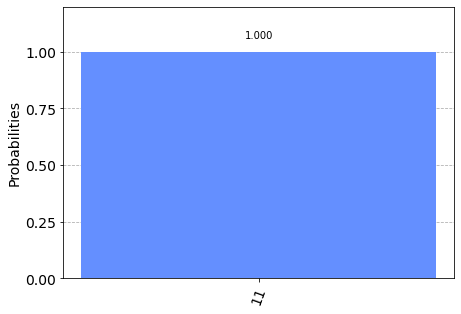

In [20]:
print("\nTotal count are:\n",counts)
plot_histogram(counts)

In [12]:
from qiskit.visualization import plot_circuit_layout
from qiskit import IBMQ
from qiskit import transpile
backend = Aer.get_backend('qasm_simulator')

In [13]:
def create_bell_state(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [14]:
def encode_alice_message(qc,qubit,msg):
    if msg=="00":
        pass
    elif msg=="10":
        qc.x(qubit)
    elif msg=="01":
        qc.z(qubit)
    elif msg=="11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("\nInvalid Message, Sending '00'\n")

In [15]:
def decode_bob_message(qc,a,b):
    qc.cx(a,b)
    qc.h(a)

In [16]:
qc = QuantumCircuit(2)

create_bell_state(qc,0,1)
qc.barrier()

message = "10" #For Example

encode_alice_message(qc,0,message)# Variable name 'previously used'
qc.barrier()

decode_bob_message(qc,0,1)

qc.measure_all()

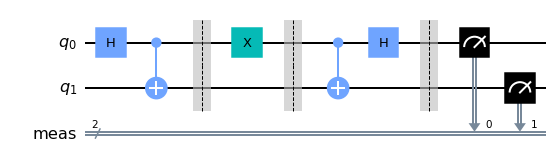

In [17]:
qc.draw('mpl')


Total count are:
 {'10': 1000}


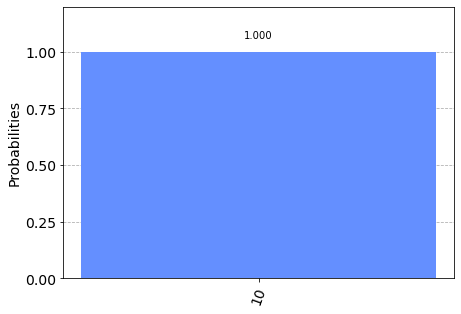

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count are:\n",counts)
plot_histogram(counts)